
# Project:

### Exploring relationship between Social-economic Variables and HIV prevalence for both sex (15-24 age group) in ten years between 1991-2000 among a group of different countries based on GAPMINDER data.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction and Data Combining

### Variables included
> [**Social-economic factors (1-6), Health factors (7-8)**](https://www.gapminder.org/data/): 
1. Employment rate (%),females aged 15-24
2. Employment rate (%),males aged 15-24
4. Democracy score (use as color)
5. GDP/capita (USD,inflation-adjusted)
6. Human Development Index (HDI)
7. Ratio girls/boys in school, primary and secondary education (%)
8. Prevalence of HIV,female (% age 15-24)
9. Prevalence of HIV,male (% age 15-24)

In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Build a holistic dataset by combining 8 different sub-datasets

In [2]:
# import 'Employment rate (%),females aged 15-24.csv'
df1= pd.read_csv('females_aged_15_24_employment_rate_percent.csv',index_col='country')
# calculate 'mean female employment rate between 1991 and 2000'
df1['EmpRt_F_mean']=df1[['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']].mean(axis=1)

In [3]:
# import 'Employment rate (%),males aged 15-24.csv'
df2= pd.read_csv('males_aged_15_24_employment_rate_percent.csv',index_col='country')
# calculate 'mean male employment rate between 1991 and 2000'
df2['EmpRt_M_mean']=df2[['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']].mean(axis=1)

In [4]:
# import 'Democracy score (use as color).csv'
df3= pd.read_csv('democracy_score_use_as_color.csv',index_col='country')
# calculate 'mean democracy_score between 1991 and 2000'
df3['Democracy_mean']=df3[['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']].mean(axis=1)

In [5]:
# import 'gdppercapita_us_inflation_adjusted.csv'
df4= pd.read_csv('gdppercapita_us_inflation_adjusted.csv',index_col='country')
# calculate 'mean gdppercapita between 1991 and 2000'
df4['gdppercap_mean']=df4[['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']].mean(axis=1)

In [6]:
# import 'hdi_human_development_index.csv'
df5= pd.read_csv('hdi_human_development_index.csv',index_col='country')
# calculate 'mean hdi between 1991 and 2000'
df5['hdi_mean']=df5[['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']].mean(axis=1)

In [7]:
# import 'ratio_of_girls_to_boys_in_primary_and_secondary_education_perc.csv'
df6= pd.read_csv('ratio_of_girls_to_boys_in_primary_and_secondary_education_perc.csv',index_col='country')
# calculate 'mean ratio_of_girls_to_boys between 1991 and 2000'
df6['EduRatio_F2M_mean']=df6[['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']].mean(axis=1)

In [8]:
# import 'sh_hiv_1524_fe_zs.csv'
df7= pd.read_csv('sh_hiv_1524_fe_zs.csv',index_col='country')
# calculate 'mean Prevalence of HIV,female (% age 15-24) between 1991 and 2000'
df7['HIV_F_mean']=df7[['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']].mean(axis=1)

In [9]:
# import 'sh_hiv_1524_ma_zs.csv'
df8= pd.read_csv('sh_hiv_1524_ma_zs.csv',index_col='country')
# calculate 'mean Prevalence of HIV,male (% age 15-24) between 1991 and 2000'
df8['HIV_M_mean']=df8[['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']].mean(axis=1)

In [10]:
#combine 8 data series into one holistic dataframe 'df_comb' 
s=([df1['EmpRt_F_mean'],df2['EmpRt_M_mean'],df3['Democracy_mean'],df4['gdppercap_mean'],df5['hdi_mean'],df6['EduRatio_F2M_mean'],df7['HIV_F_mean'],df8['HIV_M_mean']])
df_comb=pd.concat(s,axis=1,sort=False)

In [11]:
df_comb.to_csv('combined_v1.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [12]:
#load combined dataframe
df_comb.head()

,EmpRt_F_mean,EmpRt_M_mean,Democracy_mean,gdppercap_mean,hdi_mean,EduRatio_F2M_mean,HIV_F_mean,HIV_M_mean
Afghanistan,12.790,59.02,-4.3,NaN,0.3211,0.450000,NaN,NaN
Albania,38.160,34.80,4.1,1751.0,0.6310,0.978000,0.10,0.10
Algeria,8.609,32.45,-4.1,3344.0,0.6087,0.889556,0.10,0.10
Angola,24.920,28.73,-2.1,1649.0,0.3865,0.804000,0.42,0.19
Argentina,24.960,40.08,7.2,7879.0,0.7389,1.026000,0.15,0.24


In [13]:
#check current status of dataframe, and see if data type need to be changed or missing data need to be removed;
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Tuvalu
Data columns (total 8 columns):
EmpRt_F_mean         179 non-null float64
EmpRt_M_mean         179 non-null float64
Democracy_mean       162 non-null float64
gdppercap_mean       184 non-null float64
hdi_mean             167 non-null float64
EduRatio_F2M_mean    168 non-null float64
HIV_F_mean           133 non-null float64
HIV_M_mean           133 non-null float64
dtypes: float64(8)
memory usage: 13.7+ KB


In [14]:
df_comb.shape

(195, 8)

### Data Cleaning (remove missing rows and change column names)

In [15]:
#No need to unify data type but need to clean missing values
#Remove all rows with missing value and create new dataframe
df_comb_2=df_comb.dropna()
df_comb_2.head()

,EmpRt_F_mean,EmpRt_M_mean,Democracy_mean,gdppercap_mean,hdi_mean,EduRatio_F2M_mean,HIV_F_mean,HIV_M_mean
Albania,38.160,34.80,4.1,1751.0,0.6310,0.978000,0.10,0.10
Algeria,8.609,32.45,-4.1,3344.0,0.6087,0.889556,0.10,0.10
Angola,24.920,28.73,-2.1,1649.0,0.3865,0.804000,0.42,0.19
Argentina,24.960,40.08,7.2,7879.0,0.7389,1.026000,0.15,0.24
Armenia,19.430,31.47,3.4,1171.1,0.6158,1.070000,0.10,0.10


In [16]:
#save cleaned dataframe to 'combined_v2.csv'
df_comb_2.to_csv('combined_v2.csv')

In [17]:
#check if new dataframe has missing value
df_comb_2.isnull().sum()

EmpRt_F_mean         0
EmpRt_M_mean         0
Democracy_mean       0
gdppercap_mean       0
hdi_mean             0
EduRatio_F2M_mean    0
HIV_F_mean           0
HIV_M_mean           0
dtype: int64

In [18]:
#rename column labels by take out '_mean' and make lowercase
df_comb_3=df_comb_2.rename(columns=lambda x: x.strip('_mean').lower())
df_comb_3.head()

,emprt_f,emprt_m,democracy,gdppercap,hdi,eduratio_f2m,hiv_f,hiv_m
Albania,38.160,34.80,4.1,1751.0,0.6310,0.978000,0.10,0.10
Algeria,8.609,32.45,-4.1,3344.0,0.6087,0.889556,0.10,0.10
Angola,24.920,28.73,-2.1,1649.0,0.3865,0.804000,0.42,0.19
Argentina,24.960,40.08,7.2,7879.0,0.7389,1.026000,0.15,0.24
Armenia,19.430,31.47,3.4,1171.1,0.6158,1.070000,0.10,0.10


In [19]:
#Selectively change first two column names to make it easier to read
df_comb_3.rename(columns={'emprt_f':'employ_f','emprt_m':'employ_m'},inplace=True)

In [20]:
df_comb_3.head()

,employ_f,employ_m,democracy,gdppercap,hdi,eduratio_f2m,hiv_f,hiv_m
Albania,38.160,34.80,4.1,1751.0,0.6310,0.978000,0.10,0.10
Algeria,8.609,32.45,-4.1,3344.0,0.6087,0.889556,0.10,0.10
Angola,24.920,28.73,-2.1,1649.0,0.3865,0.804000,0.42,0.19
Argentina,24.960,40.08,7.2,7879.0,0.7389,1.026000,0.15,0.24
Armenia,19.430,31.47,3.4,1171.1,0.6158,1.070000,0.10,0.10


In [21]:
#check the condition of the new dataframe
df_comb_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, Albania to Zimbabwe
Data columns (total 8 columns):
employ_f        109 non-null float64
employ_m        109 non-null float64
democracy       109 non-null float64
gdppercap       109 non-null float64
hdi             109 non-null float64
eduratio_f2m    109 non-null float64
hiv_f           109 non-null float64
hiv_m           109 non-null float64
dtypes: float64(8)
memory usage: 7.7+ KB


In [22]:
#check if the new dataframe has missing data
df_comb_3.isnull().sum().sum()

0

In [23]:
#save cleaned dataframe to 'combined_v3.csv'
df_comb_3.to_csv('combined_v3.csv')

<a id='eda'></a>
## Exploratory Data Analysis


### Observation 0: General visualization of data

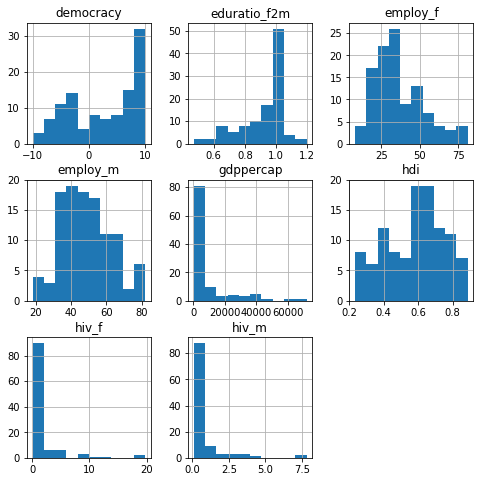

In [24]:
# generate histogram of each column to see how data is distributed;
df_comb_3.hist(figsize=(8,8));

In [25]:
#check if any column is a normal distribution
(df_comb_3.mean()/df_comb_3.median())==1

employ_f        False
employ_m        False
democracy       False
gdppercap       False
hdi             False
eduratio_f2m    False
hiv_f           False
hiv_m           False
dtype: bool

In [26]:
#check if any column is positive or negative skewed
(df_comb_3.mean()/df_comb_3.median())>1

employ_f         True
employ_m         True
democracy       False
gdppercap        True
hdi             False
eduratio_f2m    False
hiv_f            True
hiv_m            True
dtype: bool

#### Conclusion 0: 
1. All data series are not normal distribution.
2. Right skewed series (5):employ_f, employ_m, gdppercap, hiv_f, hiv_m
3. Left skewed series (3):democracy, hdi, eduratio_f2m

### Research Question 1  (Which country has the highest HIV prevalence rate for male and female?)

In [27]:
#check the max bound of hiv prevalence rate, max hiv rate for female is 19.76%, max hiv rate for male is 7.81%
df_comb_3.describe()

,employ_f,employ_m,democracy,gdppercap,hdi,eduratio_f2m,hiv_f,hiv_m
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,36.720771,48.722477,2.689450,8067.264883,0.580611,0.925374,1.525321,0.692110
std,16.281421,14.104704,6.103407,13621.373719,0.170344,0.142224,3.421108,1.304125
min,8.052000,18.120000,-10.000000,186.300000,0.234600,0.472800,0.100000,0.100000
25%,24.910000,37.770000,-3.000000,811.700000,0.436500,0.869222,0.100000,0.100000
50%,33.350000,47.420000,4.000000,2251.500000,0.607800,0.985000,0.110000,0.170000
75%,47.670000,58.000000,8.100000,7572.000000,0.702400,1.017500,0.860000,0.590000
max,81.060000,82.160000,10.000000,71990.000000,0.887100,1.195556,19.760000,7.810000


##### Check which country has the highest  female hiv rate

In [28]:
#who has the highest female hiv rate
df_comb_3.query('hiv_f>19.75')

,employ_f,employ_m,democracy,gdppercap,hdi,eduratio_f2m,hiv_f,hiv_m
Zimbabwe,47.49,50.43,-5.4,1264.0,0.462,0.940167,19.76,7.64


##### Check which country has the highest male hiv rate

In [29]:
#who has the highest male hiv rate
df_comb_3.query('hiv_m>7.80')

,employ_f,employ_m,democracy,gdppercap,hdi,eduratio_f2m,hiv_f,hiv_m
Botswana,24.84,35.71,7.4,4388.0,0.576,1.04625,19.62,7.81


#### Conclusion 1: 
1. Zimbabwe has the highest female HIV prevalence for age group of 15-24 years old;
2. Botswana has the highest male HIV prevalence for age group of 15-24 years old;
3. Both of those countries seems to have high HIV prevalence for both sex;
4. For those two countries in this age group, HIV prevalence in female is more than twice higher than male's prevalence.

### Research Question 2  (How is female HIV prevalence related to male HIV prevalence?)

##### Scatter plot female hiv prevalence rate over male's rate using whole dataframe (df_comb_3)

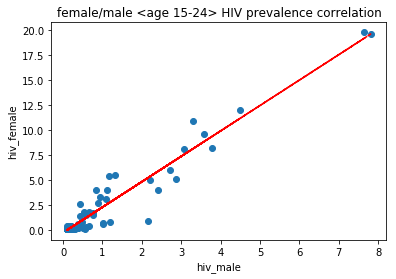

In [30]:
# scatter plot female hiv prevalence rate over male's rate
x = df_comb_3['hiv_m']
y = df_comb_3['hiv_f']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('female/male <age 15-24> HIV prevalence correlation')
plt.xlabel('hiv_male')
plt.ylabel('hiv_female')
plt.show()

In [51]:
#For whole dataset, what is the mean ratio between female and male HIV prevalence
mean_hiv_f2m=(df_comb_3['hiv_f']/df_comb_3['hiv_m']).mean()

In [75]:
print (mean_hiv_f2m)

1.47150176161


#### Conclusion 2: 
1. Based on the observation of scatter plot, HIV prevalence for female and male in different countries seems to have a strong positive correlation.
2. A hypothesis based on the observation is the positive correlation may be related to sexual activity.
3. Based on the observation of scatter plot, most data are crowded in the lower left side of the graph because the data for HIV is heavily right skewed.
4. For whole dataframe, female HIV prevalence is around 1.47 times more than male.

#### Reorgnize dataframe based on different level of HIV prevalence 

In [32]:
# devide hiv_female into 3 levels according to min, 25%, 75% and max
# create new column 'hivf_level'
bin_edges_hivf=[0,0.1,0.86,20]
bin_names_hivf=['low','medium','high']
df_comb_3['hivf_level']=pd.cut(df_comb_3['hiv_f'],bin_edges_hivf,labels=bin_names_hivf)

In [33]:
# devide hiv_male into 3 levels according to min, 25%, 75% and max
# create new column 'hivm_level'
bin_edges_hivm=[0,0.1,0.59,8]
bin_names_hivm=['low','medium','high']
df_comb_3['hivm_level']=pd.cut(df_comb_3['hiv_m'],bin_edges_hivm,labels=bin_names_hivm)

In [34]:
df_comb_3.head()

,employ_f,employ_m,democracy,gdppercap,hdi,eduratio_f2m,hiv_f,hiv_m,hivf_level,hivm_level
Albania,38.160,34.80,4.1,1751.0,0.6310,0.978000,0.10,0.10,low,low
Algeria,8.609,32.45,-4.1,3344.0,0.6087,0.889556,0.10,0.10,low,low
Angola,24.920,28.73,-2.1,1649.0,0.3865,0.804000,0.42,0.19,medium,medium
Argentina,24.960,40.08,7.2,7879.0,0.7389,1.026000,0.15,0.24,medium,medium
Armenia,19.430,31.47,3.4,1171.1,0.6158,1.070000,0.10,0.10,low,low


In [35]:
df_comb_3.shape

(109, 10)

### Research Question 3  (How is female/ male HIV prevalence correlation for countries with lower than medium HIV prevalence lower than high level (below average)?)

#### Creat a new dataframe for countries with below average HIV prevalence

In [36]:
#create another dataframe (where both female and male HIV prevalence are below average) to see if the conclusion in question2 is still true. 
df_comb_4=df_comb_3.query('hiv_f<1.525321 and hiv_f<0.692110')

In [37]:
df_comb_4.head()

,employ_f,employ_m,democracy,gdppercap,hdi,eduratio_f2m,hiv_f,hiv_m,hivf_level,hivm_level
Albania,38.160,34.80,4.1,1751.0,0.6310,0.978000,0.10,0.10,low,low
Algeria,8.609,32.45,-4.1,3344.0,0.6087,0.889556,0.10,0.10,low,low
Angola,24.920,28.73,-2.1,1649.0,0.3865,0.804000,0.42,0.19,medium,medium
Argentina,24.960,40.08,7.2,7879.0,0.7389,1.026000,0.15,0.24,medium,medium
Armenia,19.430,31.47,3.4,1171.1,0.6158,1.070000,0.10,0.10,low,low


In [38]:
#check the number of countries with HIV prevalence below average
df_comb_4.shape

(79, 10)

##### Scatter plot female hiv prevalence rate over male's rate using below average dataframe(df_comb_4)

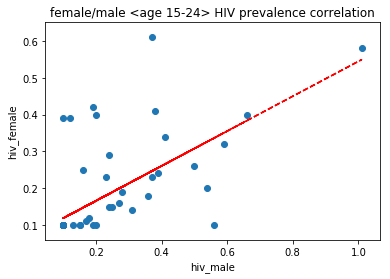

In [39]:
# scatter plot female hiv prevalence rate over male's rate again
x = df_comb_4['hiv_m']
y = df_comb_4['hiv_f']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('female/male <age 15-24> HIV prevalence correlation')
plt.xlabel('hiv_male')
plt.ylabel('hiv_female')
plt.show()

In [50]:
#For the lower half of the dataset, what is the mean ratio between female and male HIV prevalence
mean_hiv_f2m_belowaverage=(df_comb_4['hiv_f']/df_comb_4['hiv_m']).mean()

##### Create a bar chart for comparing the mean female to male HIV ratio between the whole dataframe(df_comb_3) and below average dataframe(df_comb_4)

Text(0,0.5,'mean female to male HIV prevalence ratio')

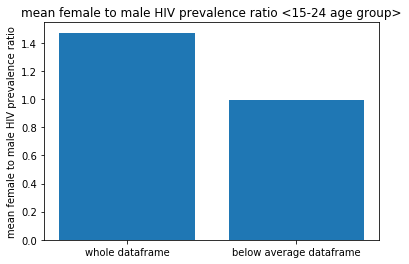

In [56]:
# Create a bar chart for comparing the mean female to male HIV ratio 
locations=[1,2]
heights=[mean_hiv_f2m,mean_hiv_f2m_belowaverage]
labels=['whole dataframe','below average dataframe']
plt.bar(locations,heights,tick_label=labels);
plt.title('mean female to male HIV prevalence ratio <15-24 age group>')
plt.ylabel('mean female to male HIV prevalence ratio')

#### Conclusion 3: 
1. Based on the observation of scatter plot, the data for below average HIV prevalence countries suggest that HIV prevalence for female and male  seems to still have a strong positive correlation.
2. Based on the observation of bar chart, the mean HIV prevalence ratio between female & male is almost 1, which is lower than the whole dataframe.

### Research Question 4  (How does social-economic factors relate to HIV prevalence for the whole datasets?)

#### 4.1 Does countries with high HIV prevalence (15-24 age group) have lower HDI?

##### Calculate mean HDI for countries in different HIV prevalence level

In [66]:
# calculate mean HDI for countries in different HIV prevalence level
hdi_mean_f=df_comb_3.groupby(['hivf_level'])['hdi'].mean()
hdi_mean_m=df_comb_3.groupby(['hivm_level'])['hdi'].mean()

##### Create a bar chart for comparing HDI in countris with different HIV prevalence level

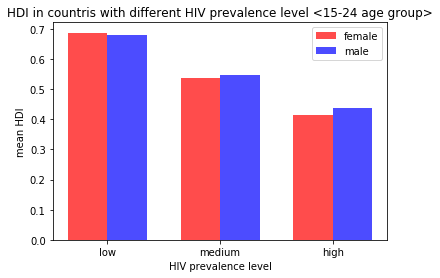

In [69]:
N=3
ind=np.arange(N)
width=0.35

# plot bars
red_bars = plt.bar(ind, hdi_mean_f, width, color='r', alpha=.7, label='female')
blue_bars = plt.bar(ind + width, hdi_mean_m, width, color='b', alpha=.7, label='male')

# title and labels
plt.ylabel('mean HDI')
plt.xlabel('HIV prevalence level')
plt.title('HDI in countris with different HIV prevalence level <15-24 age group>')
locations = ind + width / 2  # xtick locations
labels = ['low', 'medium', 'high']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

#### Conclusion 4.1: 
1. Based on observation of bar chart, countries with lower HIV prevalence for both sex in the age between 15-24 seems to have higher Human development index.

#### 4.2 Does countries with low HIV prevalence (15-24 age group) have higher female basic education (elementry, secondary) rate?

In [72]:
# calculate mean Ratio girls/boys in school, primary and secondary education for countries in different HIV prevalence level
eduratio_mean_f=df_comb_3.groupby(['hivf_level'])['eduratio_f2m'].mean()
eduratio_mean_m=df_comb_3.groupby(['hivm_level'])['eduratio_f2m'].mean()

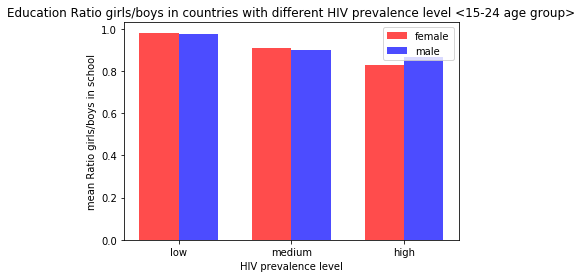

In [84]:
N=3
ind=np.arange(N)
width=0.35

# plot bars
red_bars = plt.bar(ind,eduratio_mean_f, width, color='r', alpha=.7, label='female')
blue_bars = plt.bar(ind + width,eduratio_mean_m, width, color='b', alpha=.7, label='male')

# title and labels
plt.ylabel('mean Ratio girls/boys in school')
plt.xlabel('HIV prevalence level')
plt.title('Education Ratio girls/boys in countries with different HIV prevalence level <15-24 age group>')
locations = ind + width / 2  # xtick locations
labels = ['low', 'medium', 'high']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

#### Conclusion 4.2: 
1. Based on observation of bar chart, countries with lower HIV prevalence for both sex in the age between 15-24 seems to have higher Ratio girls/boys in school (primary and secondary education).

#### 4.3 Does countries with low HIV prevalence (15-24 age group) have higher employment rate?

In [76]:
# calculate mean employment rate for countries in different HIV prevalence level
employrate_mean_f=df_comb_3.groupby(['hivf_level'])['employ_f'].mean()
employrate_mean_m=df_comb_3.groupby(['hivm_level'])['employ_m'].mean()

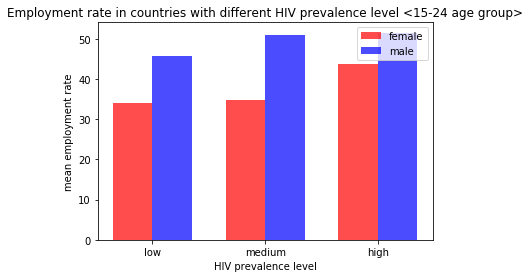

In [83]:
N=3
ind=np.arange(N)
width=0.35

# plot bars
red_bars = plt.bar(ind,employrate_mean_f, width, color='r', alpha=.7, label='female')
blue_bars = plt.bar(ind + width,employrate_mean_m, width, color='b', alpha=.7, label='male')

# title and labels
plt.ylabel('mean employment rate')
plt.xlabel('HIV prevalence level')
plt.title('Employment rate in countries with different HIV prevalence level <15-24 age group>')
locations = ind + width / 2  # xtick locations
labels = ['low', 'medium', 'high']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

#### Conclusion 4.3: 
1. Based on observation of bar chart, countries with lower HIV prevalence for both sex in the age between 15-24 seems to have lower employment ratio.
2. This result may need to be further investigated since the employment rate data is not specifically targeted to the age group (15-24).

#### 4.4 Does countries with low HIV prevalence (15-24 age group) have higher GDP per capita?

In [80]:
# calculate mean GDP per capita for countries in different HIV prevalence level
gdp_mean_f=df_comb_3.groupby(['hivf_level'])['gdppercap'].mean()
gdp_mean_m=df_comb_3.groupby(['hivm_level'])['gdppercap'].mean()

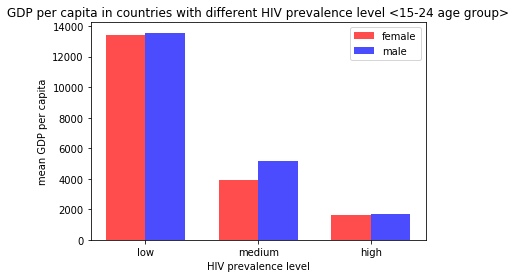

In [82]:
N=3
ind=np.arange(N)
width=0.35

# plot bars
red_bars = plt.bar(ind,gdp_mean_f, width, color='r', alpha=.7, label='female')
blue_bars = plt.bar(ind + width,gdp_mean_m, width, color='b', alpha=.7, label='male')

# title and labels
plt.ylabel('mean GDP per capita')
plt.xlabel('HIV prevalence level')
plt.title('GDP per capita in countries with different HIV prevalence level <15-24 age group>')
locations = ind + width / 2  # xtick locations
labels = ['low', 'medium', 'high']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

#### Conclusion 4.4: 
1. Based on observation of bar chart, countries with lower HIV prevalence for both sex in the age between 15-24 seems to have higher GDP per capita.

<a id='conclusions'></a>
## Conclusions

### Global limitation: all observations in this project are made based on GAPMINDER data in ten years between 1991-2000 among 109 different countries.  

#### Observation towards the whole data frame(109 countries) was performed (conclusion 0)
1. All data series are not normal distribution.
2. Right skewed series (5):employ_f, employ_m, gdppercap, hiv_f, hiv_m
3. Left skewed series (3):democracy, hdi, eduratio_f2m

#### Quantitative analysis towards the whole data frame(109 countries) was performed (Q1)
1. Zimbabwe has the highest female HIV prevalence for age group of 15-24 years old;
2. Botswana has the highest male HIV prevalence for age group of 15-24 years old;
3. Both of those countries seems to have high HIV prevalence for both sex;
4. For those two countries in this age group, HIV prevalence in female is more than twice higher than male's prevalence.

#### Observation towards the whole data frame(109 countries) was performed (Q2)
1. Based on the observation of a scatter plot, HIV prevalence for female and male in different countries seems to have a strong positive correlation for age group of 15-24. The higher the HIV prevalence in female, the higher the prevalence in male.
2. A hypothesis based on the observation is the positive correlation may be related to sexual activity.
3. Based on the observation of a scatter plot, most data are crowded in the lower left side of the graph because the data for HIV is heavily right skewed.
4. For whole dataframe, female HIV prevalence for age group 15-24 is around 1.47 times more than male.

#### Observation towards a new data frame(79 countries) was performed to double check the observations made in conclusion 2 (Q3)
1. Based on the observation of a scatter plot, for the new data frame (countries with HIV prevalence below average) suggest that HIV prevalence for female and male seems to still have a strong positive correlation.
2. However, based on the observation of a bar chart, the mean HIV prevalence ratio between female & male for age group 15-24 is almost one to one, which is obviously lower than the ratio (1.47) calculated from whole dataframe.

#### Explorational observations towards the whole data frame(109 countries) was performed to understand the correlation between social-ecnomic variables and HIV prevalence for both sex for age group 15-24 (Q4)
1. Based on observation of a bar chart, countries with lower HIV prevalence for both sex in the age between 15-24 seems to have higher Human development index.
2. Based on observation of a bar chart, countries with lower HIV prevalence for both sex in the age between 15-24 seems to have higher Ratio girls/boys in school (primary and secondary education).
4. Based on observation of a bar chart, countries with lower HIV prevalence for both sex in the age between 15-24 seems to have lower employment ratio. However, this result may need to be further investigated since the employment rate data is not specifically targeted to the specific age group (15-24).
4. Based on observation of a bar chart, countries with lower HIV prevalence for both sex in the age between 15-24 seems to have higher GDP per capita.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0